# Import Modules
You may need to install some of them.

In [9]:
using Revise # for development useful
using DeconvOptim, TestImages, Colors, FFTW, Noise, ImageShow

# load test image
img = Float32.(testimage("resolution_test_512"))

# generate simple Point Spread Function of aperture radius 30
psf = Float32.(generate_psf(size(img), 30))

# create a blurred, noisy version of that image
img_b = conv_psf(img, psf)
img_n = poisson(img_b, 300)

regularizer = GR()

#96 (generic function with 1 method)

  0.966107 seconds (17.79 M allocations: 1.143 GiB, 4.67% gc time, 37.40% compilation time)


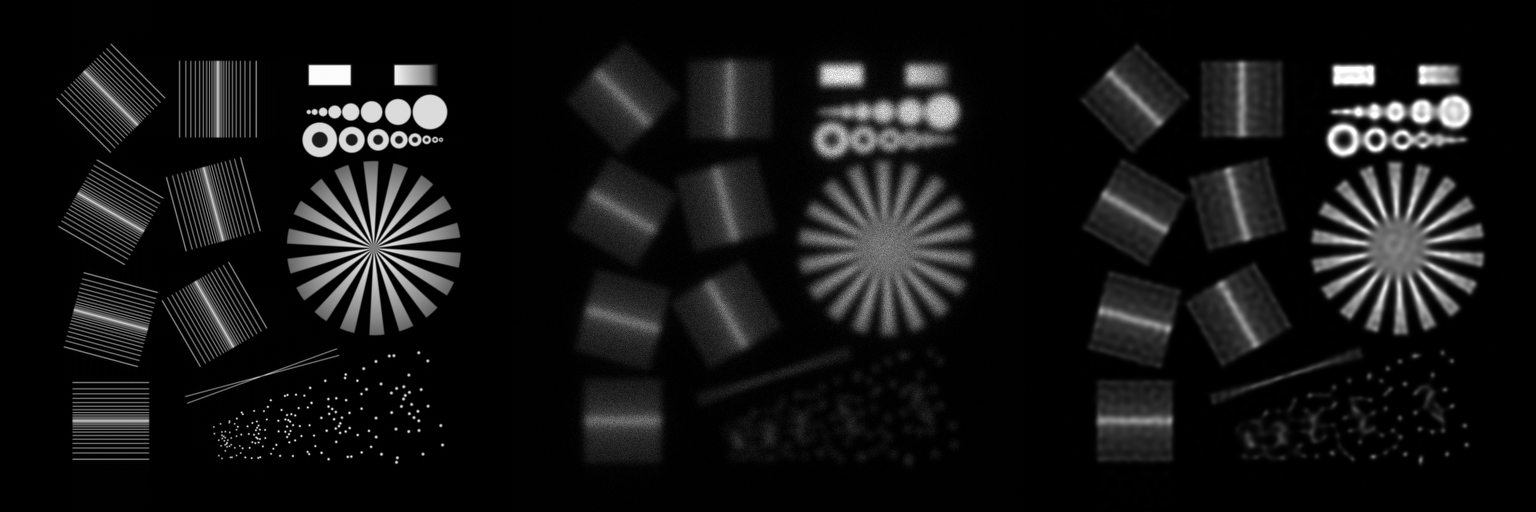

In [10]:
# deconvolve 2D with default options
@time res, o = deconvolution(img_n, psf, regularizer=regularizer)

# show final results next to original and blurred version
Gray.([img img_n res])